In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
heart_df = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


* categorical data : 'sex' , 'cp' , 'fbs' , 'reestecg', 'exng' , 'slp'
* Numerical data: 'age' , 'trtbps' , 'chol' , 'thalachh' , 'oldpeak'

In [4]:
o2sat_df = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
o2sat_df.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


# Data analysis

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There is no missing values

In [7]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
heart_df.describe().round(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.4,0.7,1.0,131.6,246.3,0.1,0.5,149.6,0.3,1.0,1.4,0.7,2.3,0.5
std,9.1,0.5,1.0,17.5,51.8,0.4,0.5,22.9,0.5,1.2,0.6,1.0,0.6,0.5
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,47.5,0.0,0.0,120.0,211.0,0.0,0.0,133.5,0.0,0.0,1.0,0.0,2.0,0.0
50%,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,0.8,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,274.5,0.0,1.0,166.0,1.0,1.6,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0


In [9]:
X = heart_df.drop('output',axis=1)
y = heart_df['output']

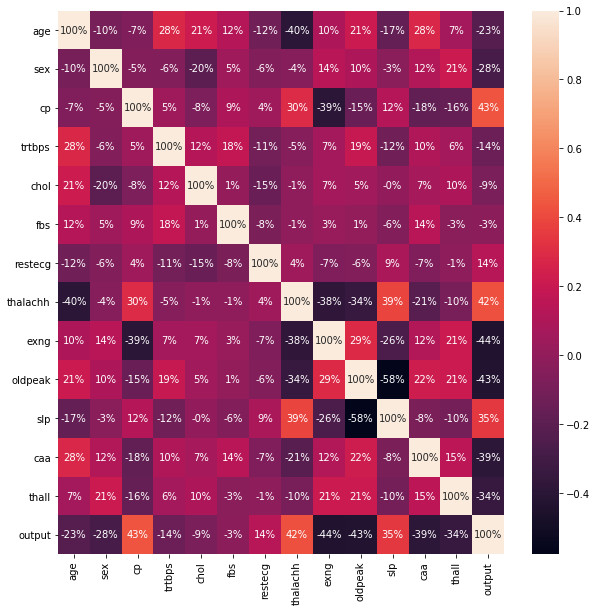

In [10]:
plt.figure(figsize=(10,10))
corr = heart_df.corr()
sns.heatmap(corr,annot= True, fmt='2.00%')
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(len(X_train))

242


In [13]:
scaling = MinMaxScaler(feature_range=(0,1))
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [14]:
model_rfc = RandomForestClassifier(random_state=0).fit(X_train,y_train)
predict_rfc = model_rfc.predict(X_test)
predict_proba = model_rfc.predict_proba(X_test)[:,1]

In [15]:
predict_proba.shape

(61,)

In [16]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [17]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [18]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

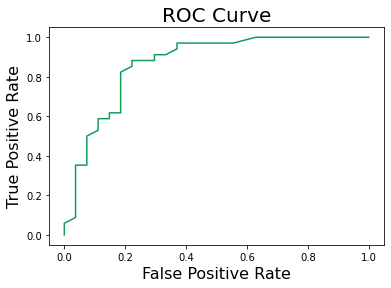

In [19]:
ROC = roc_from_scratch(predict_proba,y_test)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.show()

### Note I need to test another model like SVC, KNeighborsClassifier